In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.19.0
Keras version: 3.10.0


---
# Частина 1: Задача Регресії

In [ ]:
X_reg, y_reg = make_regression(
    n_samples=1000,       
    n_features=20,        
    n_informative=15,     
    n_targets=1,           
    noise=10.0,           
    random_state=42
)

print(f"Розмір набору даних: {X_reg.shape}")
print(f"Розмір цільових значень: {y_reg.shape}")
print(f"\nДіапазон цільових значень: [{y_reg.min():.2f}, {y_reg.max():.2f}]")

Розмір набору даних: (1000, 20)
Розмір цільових значень: (1000,)

Діапазон цільових значень: [-707.03, 899.81]


In [ ]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

print(f"Тренувальна вибірка: {X_train_reg_scaled.shape}")
print(f"Тестова вибірка: {X_test_reg_scaled.shape}")

Тренувальна вибірка: (800, 20)
Тестова вибірка: (200, 20)


In [ ]:
model_regression = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_reg_scaled.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(1)  
])

model_regression.compile(
    optimizer='adam',
    loss='mse',  
    metrics=['mae']  
)

model_regression.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,953 (54.50 KB)

 Trainable params: 13,505 (52.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
early_stopping_reg = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

reduce_lr_reg = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=1e-7,
    verbose=1
)

history_reg = model_regression.fit(
    X_train_reg_scaled, y_train_reg,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping_reg, reduce_lr_reg],
    verbose=1
)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 50452.4414 - mae: 180.5722 - val_loss: 63499.2305 - val_mae: 201.7935 - learning_rate: 0.0010
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 49992.6992 - mae: 179.6685 - val_loss: 63266.4141 - val_mae: 201.4260 - learning_rate: 0.0010
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 49508.6094 - mae: 178.8517 - val_loss: 62814.6641 - val_mae: 200.6976 - learning_rate: 0.0010
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 48757.9453 - mae: 177.4250 - val_loss: 62074.7383 - val_mae: 199.4837 - learning_rate: 0.0010
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 48146.5430 - mae: 176.2533 - val_loss: 61088.2500 - val_mae: 197.8348 - learning_rate: 0.0010
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 47412.1367 - mae: 174.8913 - val_loss: 60017.1758 - val_mae: 196.0054 - learning_rate: 0.0010
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 46790.7383 - mae: 173.

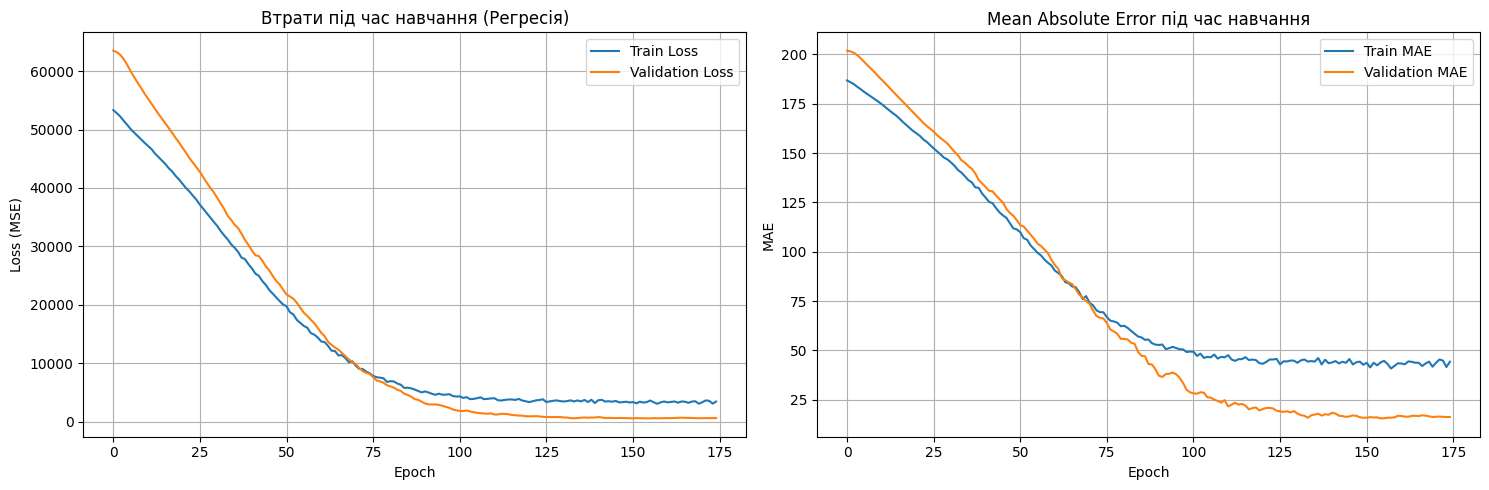

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(history_reg.history['loss'], label='Train Loss')
axes[0].plot(history_reg.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].set_title('Втрати під час навчання (Регресія)')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(history_reg.history['mae'], label='Train MAE')
axes[1].plot(history_reg.history['val_mae'], label='Validation MAE')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MAE')
axes[1].set_title('Mean Absolute Error під час навчання')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
y_pred_reg = model_regression.predict(X_test_reg_scaled).flatten()

mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
rmse_reg = np.sqrt(mse_reg)
r2_reg = r2_score(y_test_reg, y_pred_reg)

print("="*50)
print("РЕЗУЛЬТАТИ РЕГРЕСІЇ")
print("="*50)
print(f"Mean Squared Error (MSE): {mse_reg:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_reg:.4f}")
print(f"R² Score: {r2_reg:.4f}")
print("="*50)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
РЕЗУЛЬТАТИ РЕГРЕСІЇ
Mean Squared Error (MSE): 303.8612
Root Mean Squared Error (RMSE): 17.4316
R² Score: 0.9941


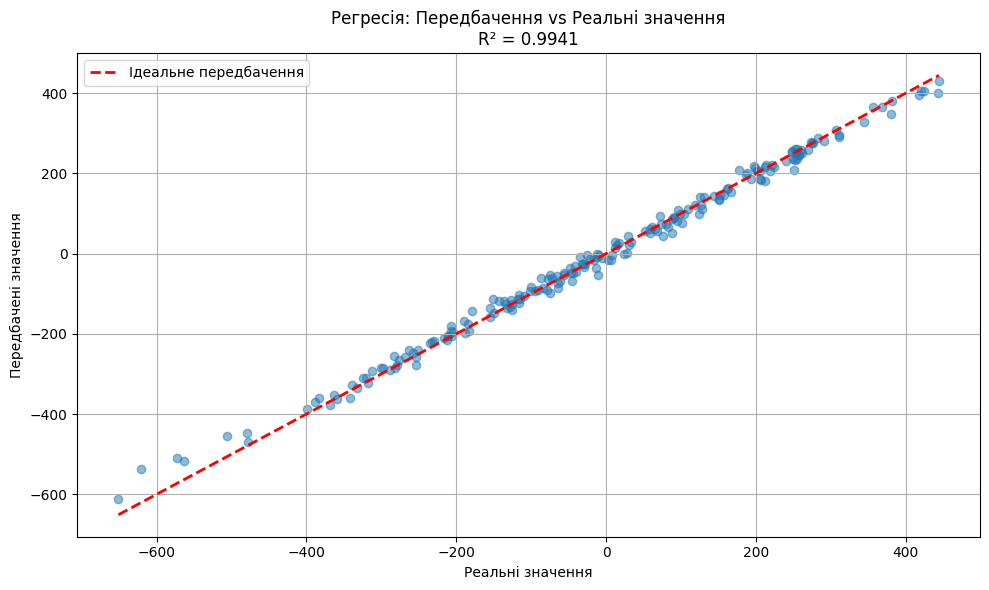

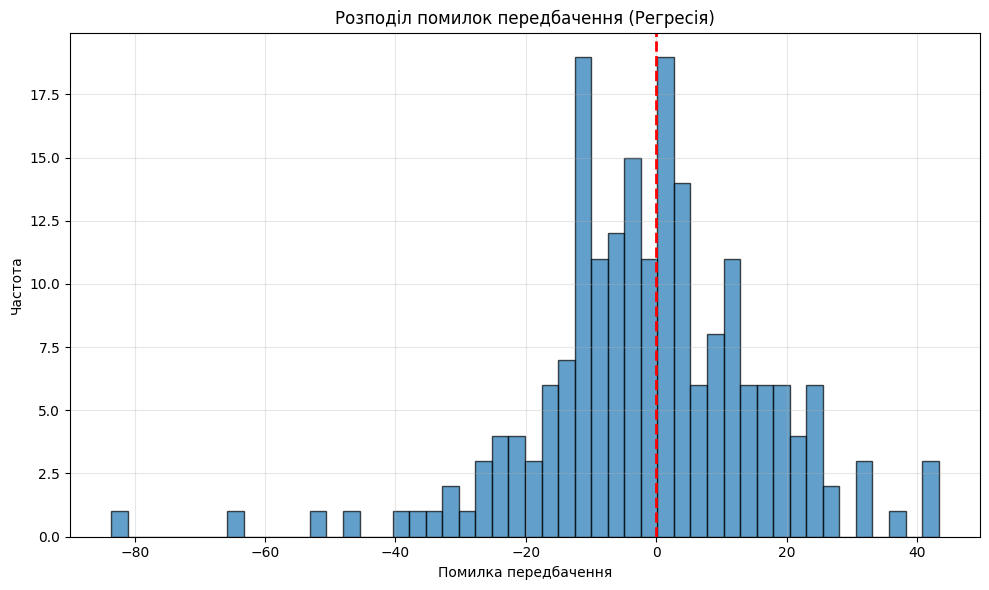

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()],
         'r--', lw=2, label='Ідеальне передбачення')
plt.xlabel('Реальні значення')
plt.ylabel('Передбачені значення')
plt.title(f'Регресія: Передбачення vs Реальні значення\nR² = {r2_reg:.4f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

errors_reg = y_test_reg - y_pred_reg

plt.figure(figsize=(10, 6))
plt.hist(errors_reg, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Помилка передбачення')
plt.ylabel('Частота')
plt.title('Розподіл помилок передбачення (Регресія)')
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---
# Частина 2: Задача Класифікації


In [ ]:
X_clf, y_clf = make_classification(
    n_samples=1000,           
    n_features=20,            
    n_informative=15,        
    n_redundant=5,           
    n_classes=3,             
    n_clusters_per_class=2,  
    flip_y=0.01,             
    random_state=42
)

print(f"Розмір набору даних: {X_clf.shape}")
print(f"Розмір міток: {y_clf.shape}")
print(f"\nКількість класів: {len(np.unique(y_clf))}")
print(f"Розподіл класів:")
for cls in np.unique(y_clf):
    count = np.sum(y_clf == cls)
    print(f"  Клас {cls}: {count} зразків ({count/len(y_clf)*100:.1f}%)")

Розмір набору даних: (1000, 20)
Розмір міток: (1000,)

Кількість класів: 3
Розподіл класів:
  Клас 0: 333 зразків (33.3%)
  Клас 1: 331 зразків (33.1%)
  Клас 2: 336 зразків (33.6%)


In [ ]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

print(f"Тренувальна вибірка: {X_train_clf_scaled.shape}")
print(f"Тестова вибірка: {X_test_clf_scaled.shape}")
print(f"\nРозподіл класів у тренувальній вибірці:")
for cls in np.unique(y_train_clf):
    count = np.sum(y_train_clf == cls)
    print(f"  Клас {cls}: {count} зразків")

Тренувальна вибірка: (800, 20)
Тестова вибірка: (200, 20)

Розподіл класів у тренувальній вибірці:
  Клас 0: 266 зразків
  Клас 1: 265 зразків
  Клас 2: 269 зразків


In [ ]:
model_classification = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_clf_scaled.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(3, activation='softmax') 
])

model_classification.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']
)

model_classification.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,019 (54.76 KB)

 Trainable params: 13,571 (53.01 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
early_stopping_clf = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

reduce_lr_clf = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=1e-7,
    verbose=1
)

history_clf = model_classification.fit(
    X_train_clf_scaled, y_train_clf,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping_clf, reduce_lr_clf],
    verbose=1
)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.3676 - loss: 1.5339 - val_accuracy: 0.5312 - val_loss: 1.0026 - learning_rate: 0.0010
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4658 - loss: 1.2710 - val_accuracy: 0.6500 - val_loss: 0.9315 - learning_rate: 0.0010
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5339 - loss: 1.0793 - val_accuracy: 0.7063 - val_loss: 0.8802 - learning_rate: 0.0010
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5779 - loss: 0.9718 - val_accuracy: 0.6938 - val_loss: 0.8364 - learning_rate: 0.0010
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6084 - loss: 0.9193 - val_accuracy: 0.7250 - val_loss: 0.7882 - learning_rate: 0.0010
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6310 - loss: 0.8683 - val_accuracy: 0.7375 - val_loss: 0.7428 - learning_rate: 0.0010
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6688 - loss: 0.8209 - val_ac

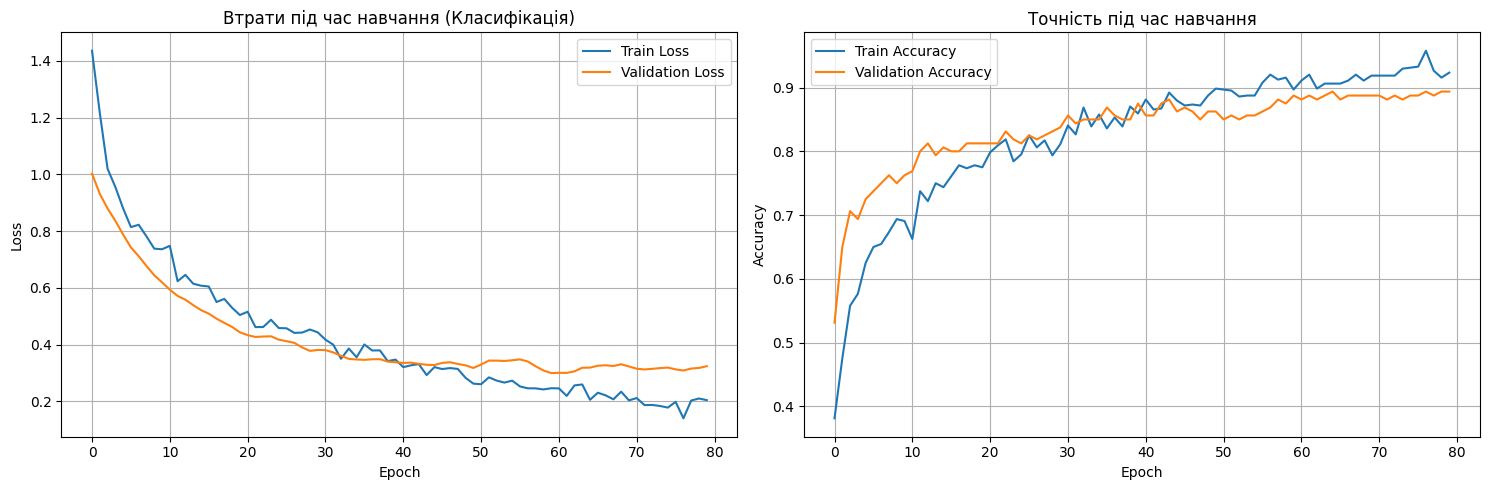

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(history_clf.history['loss'], label='Train Loss')
axes[0].plot(history_clf.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Втрати під час навчання (Класифікація)')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(history_clf.history['accuracy'], label='Train Accuracy')
axes[1].plot(history_clf.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Точність під час навчання')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
y_pred_proba_clf = model_classification.predict(X_test_clf_scaled)
y_pred_clf = np.argmax(y_pred_proba_clf, axis=1)

accuracy_clf = accuracy_score(y_test_clf, y_pred_clf)

print("="*50)
print("РЕЗУЛЬТАТИ КЛАСИФІКАЦІЇ")
print("="*50)
print(f"Точність (Accuracy): {accuracy_clf:.4f}")
print("="*50)
print("\nДетальний звіт класифікації:")
print(classification_report(y_test_clf, y_pred_clf, target_names=['Клас 0', 'Клас 1', 'Клас 2']))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
РЕЗУЛЬТАТИ КЛАСИФІКАЦІЇ
Точність (Accuracy): 0.8550

Детальний звіт класифікації:
              precision    recall  f1-score   support

      Клас 0       0.88      0.87      0.87        67
      Клас 1       0.82      0.83      0.83        66
      Клас 2       0.87      0.87      0.87        67

    accuracy                           0.85       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.85      0.86       200



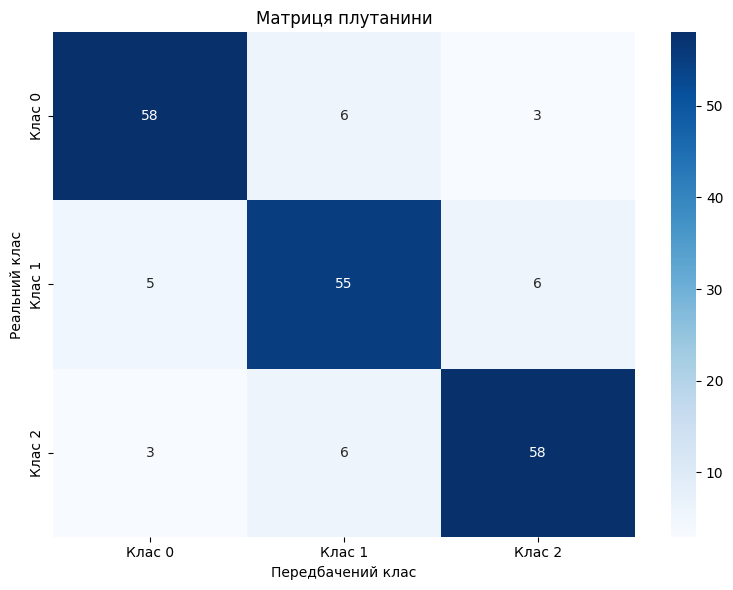

In [ ]:
cm = confusion_matrix(y_test_clf, y_pred_clf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Клас 0', 'Клас 1', 'Клас 2'],
            yticklabels=['Клас 0', 'Клас 1', 'Клас 2'])
plt.title('Матриця плутанини')
plt.ylabel('Реальний клас')
plt.xlabel('Передбачений клас')
plt.tight_layout()
plt.show()

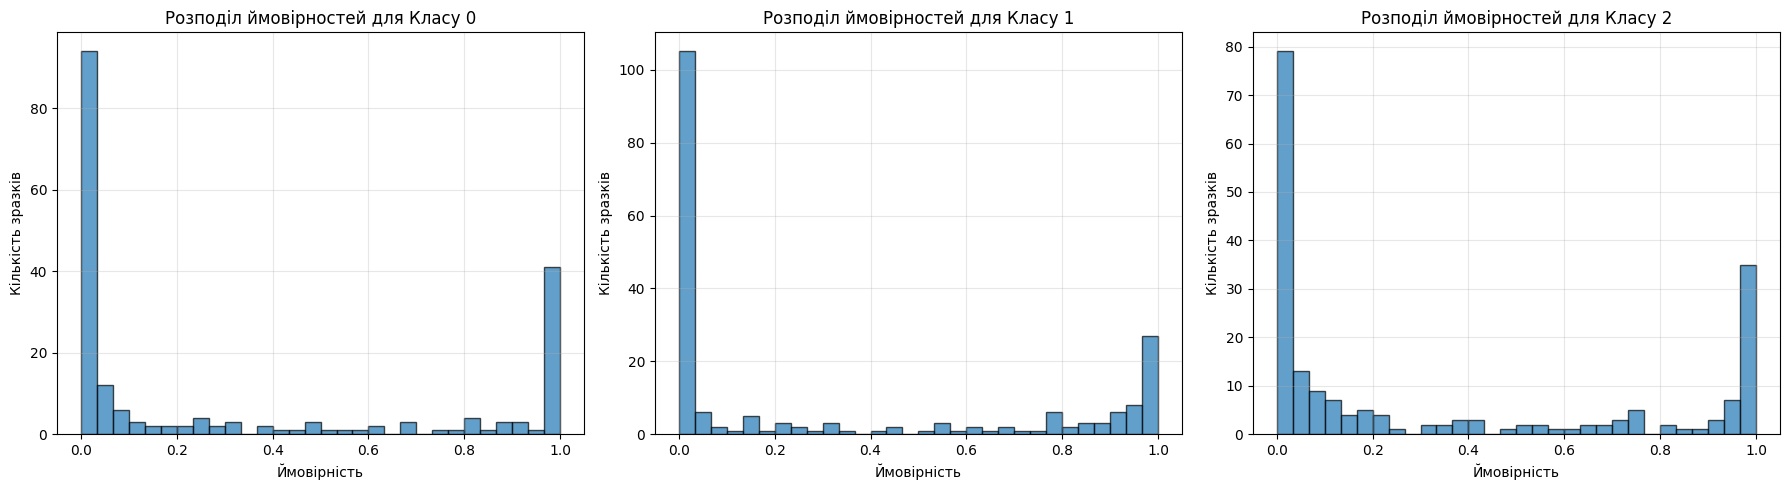

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i in range(3):
    axes[i].hist(y_pred_proba_clf[:, i], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_xlabel('Ймовірність')
    axes[i].set_ylabel('Кількість зразків')
    axes[i].set_title(f'Розподіл ймовірностей для Класу {i}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()